In [1]:
# -*- coding: utf-8 -*-
# @author: tongzi
# @created date: 2019/08/15
# @description: time series (时间序列)
# @last modification: 2019/08/15

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 11.1 Data and Time Data Types and Tools  
The python standard library includes data types for date and time data, as well as calendar-related functionality. The $datatime$, $time$ and $calendar$ modules are the main place to start. The $datetime.datetime$ type, or simply $datetime$, is widely used:


In [3]:
from datetime import datetime

In [4]:
now = datetime.now()

In [5]:
now

datetime.datetime(2019, 8, 16, 8, 47, 9, 78068)

In [6]:
now.year, now.month, now.day

(2019, 8, 16)

$datetime$ stores the date and time down to microsecond, $deltatime$ represents the temporal (暂时的，当前的)difference between two datetime object:

In [7]:
delta = datetime(2019, 8, 15, 9, 42) - datetime(2018, 5, 3, 12, 30)

In [8]:
delta

datetime.timedelta(468, 76320)

In [9]:
delta.days

468

In [10]:
delta.seconds

76320

In [11]:
from datetime import timedelta

In [12]:
start = datetime(2018, 5, 3)

In [13]:
start + timedelta(7) # add 7 days

datetime.datetime(2018, 5, 10, 0, 0)

In [14]:
start - 2 * timedelta(7) # subtract 2 * 7 = 14 days

datetime.datetime(2018, 4, 19, 0, 0)

Table 11-1 summaries the data types in the $datetime$ module. While this chapter is mainly concerned about the data types in pandas and higher-level time series manipulation, we may encounter the datetime-based types in many other places in Python in the wild.  
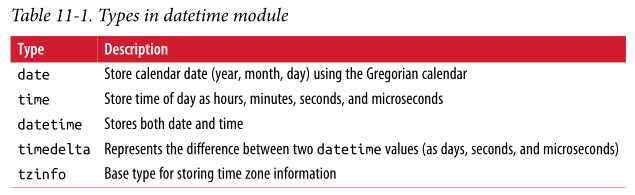

#### Converting Between String and Datetime (字符串与时间的转换)  
We can format datetime objects and pandas Timestamp objects as string using $str()$ or the $strftime()$ (string format time) method, passing the format specification:

In [15]:
stamp = datetime(2019, 8, 15)

In [16]:
str(stamp)

'2019-08-15 00:00:00'

In [17]:
stamp.strftime('%Y-%m-%d')

'2019-08-15'

See Table 11-2 for a complete list of the format codes:  
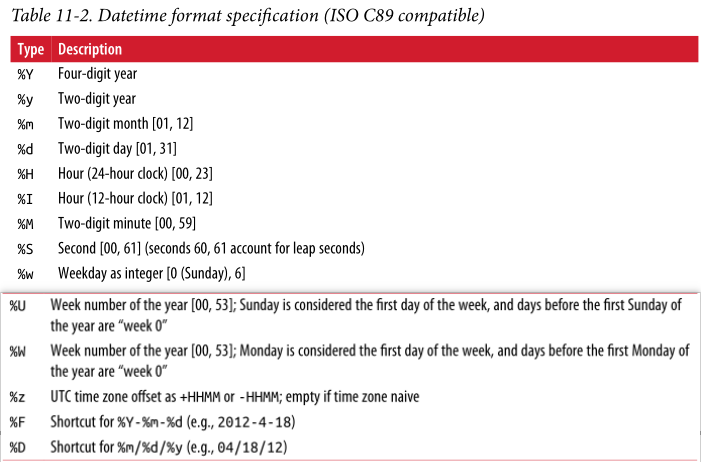

We can also use these same format to convert string to dates using $datetime.strptime()$ (string parse time):

In [18]:
val = "2019/08/15"

In [19]:
datetime.strptime(val, '%Y/%m/%d')

datetime.datetime(2019, 8, 15, 0, 0)

In [20]:
datestrs = ['8/15/2019', '3/5/2018']

In [21]:
[datetime.strptime(date, '%m/%d/%Y') for date in datestrs]

[datetime.datetime(2019, 8, 15, 0, 0), datetime.datetime(2018, 3, 5, 0, 0)]

$datetime.strptime()$ is a good way to parse a date with a known format. However, it can be a bit annoying to have to write a format spec each time, especially for common formats. In this case, we can use the $parser.parse()$ method in the third-party $dateutil$ package:

In [22]:
from dateutil.parser import parse

In [23]:
parse('2019-8-15')

datetime.datetime(2019, 8, 15, 0, 0)

In [24]:
parse('Aug 15, 2019 10:11 AM')

datetime.datetime(2019, 8, 15, 10, 11)

In international locals, day appearing before month is very common, so we pass $dayfirst=True$ to indicate this:

In [25]:
parse('15/8/2019', dayfirst=True)

datetime.datetime(2019, 8, 15, 0, 0)

The $pandas.to\_datetime()$ method parse many different kinds of date representations. Standard date formats like ISO 8601 can be parsed very quickly:

In [26]:
datestrs = ['2019-07-06 12:00:00', '2019-08-15 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2019-07-06 12:00:00', '2019-08-15 00:00:00'], dtype='datetime64[ns]', freq=None)

In [27]:
datestrs + [None]

['2019-07-06 12:00:00', '2019-08-15 00:00:00', None]

It also handles values that should be considered missing (None, empty string, etc.):

In [28]:
pd.to_datetime(datestrs + [None])

DatetimeIndex(['2019-07-06 12:00:00', '2019-08-15 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

**NaT** (Not a Time) is the pandas's null value for timestamp data.

$datetime$ objects also have a number of local-specific formatting options for systems in other countries or languages. For example, the abbreviation month names will be different in German or French systems compared with English systems. See Table 11-3 for a listing:  
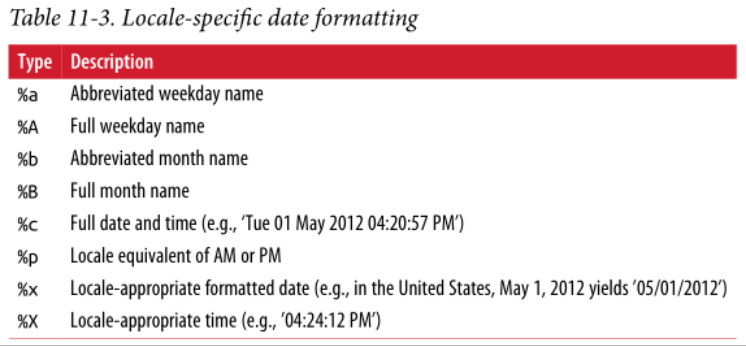

#### 11.3 Time Series Basic  


In [29]:
from datetime import datetime
dates = [datetime(2019, 7, 14), datetime(2019, 7, 18),
        datetime(2019, 8, 14), datetime(2019, 8, 15),
         datetime(2019, 8, 13), datetime(2019, 8, 12)
        ]

In [30]:
ts = pd.Series(np.random.randn(6), index=dates)

In [31]:
ts

2019-07-14   -0.894252
2019-07-18    1.325230
2019-08-14    1.944864
2019-08-15   -2.386225
2019-08-13   -0.859289
2019-08-12   -0.755368
dtype: float64

Under the hood, these datetime object is put in a DatatimeIndex:

In [32]:
ts.index

DatetimeIndex(['2019-07-14', '2019-07-18', '2019-08-14', '2019-08-15',
               '2019-08-13', '2019-08-12'],
              dtype='datetime64[ns]', freq=None)

In [33]:
ts[::2]

2019-07-14   -0.894252
2019-08-14    1.944864
2019-08-13   -0.859289
dtype: float64

Like other Series, arthmetic operations between differently indexed time series automatically align on the dates:

In [34]:
ts + ts[::2]

2019-07-14   -1.788503
2019-07-18         NaN
2019-08-12         NaN
2019-08-13   -1.718577
2019-08-14    3.889728
2019-08-15         NaN
dtype: float64

pandas stores timestamp using NumPy's $datetime64$ data type at the nanosecond resoluton:

In [35]:
ts.index.dtype

dtype('<M8[ns]')

In [36]:
stmp = ts.index[0]

In [37]:
stamp

datetime.datetime(2019, 8, 15, 0, 0)

#### Indexing, Selection, Subsetting  
Time series behaves like any pandas.Series objects when we indexing and selecting data based on label:

In [38]:
stamp = ts.index[2]
ts[stamp]

1.9448640670431134

As a convenience, you can also pass a string that is intepretable as a date:

In [39]:
ts['2019/08/15']

2019-08-15   -2.386225
dtype: float64

In [40]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2018', periods=1000))

In [41]:
longer_ts

2018-01-01    1.971713
2018-01-02    0.217626
2018-01-03   -0.976896
2018-01-04   -0.793859
2018-01-05   -0.275046
2018-01-06   -0.465709
2018-01-07   -1.640820
2018-01-08    0.529452
2018-01-09   -2.882963
2018-01-10    0.056258
2018-01-11    0.878404
2018-01-12   -0.534357
2018-01-13   -2.008482
2018-01-14   -0.305179
2018-01-15   -1.477599
2018-01-16    0.721912
2018-01-17    1.549632
2018-01-18    0.059497
2018-01-19    0.306466
2018-01-20    0.965786
2018-01-21    0.595396
2018-01-22   -0.288989
2018-01-23   -0.367910
2018-01-24   -0.205571
2018-01-25    2.239640
2018-01-26   -0.753200
2018-01-27    0.367027
2018-01-28    2.929783
2018-01-29    1.008132
2018-01-30    0.011403
                ...   
2020-08-28   -0.528657
2020-08-29    0.438704
2020-08-30    0.811230
2020-08-31    1.515581
2020-09-01    0.730358
2020-09-02    0.825775
2020-09-03    0.171365
2020-09-04    2.175431
2020-09-05    1.221634
2020-09-06    1.219646
2020-09-07    0.869599
2020-09-08    0.606635
2020-09-09 

In [42]:
longer_ts['2019'] # 这里2019被解析成年

2019-01-01    0.434316
2019-01-02    1.503388
2019-01-03    0.570724
2019-01-04   -1.271031
2019-01-05    0.045829
2019-01-06    0.294458
2019-01-07   -1.566727
2019-01-08   -0.700915
2019-01-09   -1.565300
2019-01-10   -2.033804
2019-01-11    0.002049
2019-01-12   -0.034872
2019-01-13   -1.076752
2019-01-14    0.160497
2019-01-15    0.409785
2019-01-16    0.900976
2019-01-17    1.779311
2019-01-18   -0.689075
2019-01-19   -1.123125
2019-01-20    0.154420
2019-01-21    1.284939
2019-01-22   -2.105821
2019-01-23   -0.882816
2019-01-24   -0.743350
2019-01-25    1.619838
2019-01-26   -0.215765
2019-01-27    0.175701
2019-01-28   -0.864067
2019-01-29   -0.409893
2019-01-30   -0.366518
                ...   
2019-12-02   -0.560119
2019-12-03    1.174180
2019-12-04    0.227256
2019-12-05    0.423968
2019-12-06   -0.233382
2019-12-07    1.285789
2019-12-08   -0.533363
2019-12-09   -0.739642
2019-12-10   -0.047329
2019-12-11    1.272817
2019-12-12   -1.444488
2019-12-13    0.870461
2019-12-14 

Slicing with datetime object works as well:

In [43]:
longer_ts[datetime(2018, 5, 3)]

1.2783626723824741

Because most time series data is order chronologically, we can slice with timestamps not contained in a time series to perfrom a range query: 

In [44]:
ts

2019-07-14   -0.894252
2019-07-18    1.325230
2019-08-14    1.944864
2019-08-15   -2.386225
2019-08-13   -0.859289
2019-08-12   -0.755368
dtype: float64

In [45]:
ts['2019/07/05':'2019/08/10']

2019-07-14   -0.894252
2019-07-18    1.325230
dtype: float64

As before, we can pass either a string date, datetime, or timestamp. Remember that slicing in this manner produces views on the time series like slicing on NumPy's arrays. **This means that no data is copied and modifications will be reflected in the original data.**  
  
There is an equivalent method, $truncate()$, that slices a Series between two dates:

In [46]:
ts.truncate(after='15/08/2019') # 把2019/08/15之后的数据截断不要

2019-07-14   -0.894252
2019-07-18    1.325230
2019-08-14    1.944864
2019-08-15   -2.386225
dtype: float64

In [47]:
ts

2019-07-14   -0.894252
2019-07-18    1.325230
2019-08-14    1.944864
2019-08-15   -2.386225
2019-08-13   -0.859289
2019-08-12   -0.755368
dtype: float64

All of this holds true for DataFrame as well, indexing on its rows:

In [48]:
#freq='W-WED'表示取每一个星期的周三作为频率生成日期
dates = pd.date_range('1/1/2018', periods=100, freq='W-WED')

In [49]:
long_df = pd.DataFrame(np.random.randn(100, 5), 
                       columns=['Guangzhou', 'Shenzhen', 'Guilin', 'Nanning', 'Xi\'an'],
                      index=dates)

In [50]:
long_df['2018-5']

,Guangzhou,Shenzhen,Guilin,Nanning,Xi'an
2018-05-02,1.107860,0.477647,1.999208,-0.714651,0.381397
2018-05-09,-0.240174,-0.124951,0.036453,-0.715942,-0.130506
2018-05-16,-1.197803,0.108379,-0.407155,-0.704799,0.511350
2018-05-23,0.483532,0.656823,-0.300577,1.236432,0.864317
2018-05-30,0.240019,-0.016264,0.629396,-0.512632,-0.322716


#### Time Series with Duplicate Indices  
In some applications, there may be multiple data observations falling on a particular timestamp. Here is an example:

In [51]:
dates = pd.DatetimeIndex(['1/8/2019', '2/8/2019', 
                          '4/8/2019', '5/8/2019', '5/8/2019', '8/8/2019'])

In [52]:
dup_ts = pd.Series(np.arange(6), index=dates)

In [53]:
dup_ts

2019-01-08    0
2019-02-08    1
2019-04-08    2
2019-05-08    3
2019-05-08    4
2019-08-08    5
dtype: int32

We can tell that the index is note unique by checking its $is\_unique$ property:

In [54]:
dup_ts.index.is_unique

False

In [55]:
dup_ts['2/8/2019'] # not duplicated

1

In [56]:
dup_ts['5/8/2019'] # duplicated

2019-05-08    3
2019-05-08    4
dtype: int32

Suppose we want to aggregate the data having non-unique timestamps. One way to do this is to use the $groupby()$ and pass $level=0$:

In [57]:
grouped = dup_ts.groupby(level=0)

In [58]:
grouped.mean()

2019-01-08    0.0
2019-02-08    1.0
2019-04-08    2.0
2019-05-08    3.5
2019-08-08    5.0
dtype: float64

In [59]:
list(grouped)

[(Timestamp('2019-01-08 00:00:00'), 2019-01-08    0
  dtype: int32), (Timestamp('2019-02-08 00:00:00'), 2019-02-08    1
  dtype: int32), (Timestamp('2019-04-08 00:00:00'), 2019-04-08    2
  dtype: int32), (Timestamp('2019-05-08 00:00:00'), 2019-05-08    3
  2019-05-08    4
  dtype: int32), (Timestamp('2019-08-08 00:00:00'), 2019-08-08    5
  dtype: int32)]

In [60]:
grouped.count()

2019-01-08    1
2019-02-08    1
2019-04-08    1
2019-05-08    2
2019-08-08    1
dtype: int64

### 11.3 Date Ranges, Frequencies, and Shifting  
&emsp;&emsp; Generic time series in pandas are assumed to be irregular; that is, they have no fixed frequency. For many applications, this is sufficient. However, it's desirable to work relatively to fixex frequency, such as daily, monthly, or every 15 minutes, even if that means introducing missing values into the time series. pandas has a full suit of standard time series frequencies and tools for resampling, inferring frequencies, and generating fixed -frequency date ranges. For example, we can convert the sample time series to be fixed daily frequency by calling $resample()$:

In [61]:
ts

2019-07-14   -0.894252
2019-07-18    1.325230
2019-08-14    1.944864
2019-08-15   -2.386225
2019-08-13   -0.859289
2019-08-12   -0.755368
dtype: float64

In [62]:
resampler = ts.resample('D') # 'D' means daily frequency

In [63]:
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

#### Generating Date Ranges  
$pandas.date\_range()$ is responsible for genereating a DatetimeIndex with an indicated length according to a particular frequency:

In [64]:
index = pd.date_range('2019-7-14', '2019-8-15')

In [65]:
index

DatetimeIndex(['2019-07-14', '2019-07-15', '2019-07-16', '2019-07-17',
               '2019-07-18', '2019-07-19', '2019-07-20', '2019-07-21',
               '2019-07-22', '2019-07-23', '2019-07-24', '2019-07-25',
               '2019-07-26', '2019-07-27', '2019-07-28', '2019-07-29',
               '2019-07-30', '2019-07-31', '2019-08-01', '2019-08-02',
               '2019-08-03', '2019-08-04', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-10',
               '2019-08-11', '2019-08-12', '2019-08-13', '2019-08-14',
               '2019-08-15'],
              dtype='datetime64[ns]', freq='D')

By default, $date\_range()$ generates daily timestamps. If we pass only a start or end date, we must specify the $periods$ argument:

In [66]:
pd.date_range(start='2018-5-3', periods=200)

DatetimeIndex(['2018-05-03', '2018-05-04', '2018-05-05', '2018-05-06',
               '2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-12',
               ...
               '2018-11-09', '2018-11-10', '2018-11-11', '2018-11-12',
               '2018-11-13', '2018-11-14', '2018-11-15', '2018-11-16',
               '2018-11-17', '2018-11-18'],
              dtype='datetime64[ns]', length=200, freq='D')

In [67]:
pd.date_range(end='2019/8/15', periods=50)

DatetimeIndex(['2019-06-27', '2019-06-28', '2019-06-29', '2019-06-30',
               '2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
               '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08',
               '2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12',
               '2019-07-13', '2019-07-14', '2019-07-15', '2019-07-16',
               '2019-07-17', '2019-07-18', '2019-07-19', '2019-07-20',
               '2019-07-21', '2019-07-22', '2019-07-23', '2019-07-24',
               '2019-07-25', '2019-07-26', '2019-07-27', '2019-07-28',
               '2019-07-29', '2019-07-30', '2019-07-31', '2019-08-01',
               '2019-08-02', '2019-08-03', '2019-08-04', '2019-08-05',
               '2019-08-06', '2019-08-07', '2019-08-08', '2019-08-09',
               '2019-08-10', '2019-08-11', '2019-08-12', '2019-08-13',
               '2019-08-14', '2019-08-15'],
              dtype='datetime64[ns]', freq='D')

The start and end dates define strict boundaries for the generated date index. For example, if we wanted a day index only containing the last business day of each month, we would pass $freq='BM'$ frequency and only dates falling or inside the date  interval will be included:

In [68]:
pd.date_range('2018/1/1', '2018/12/1', freq='BM')

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-30', '2018-04-30',
               '2018-05-31', '2018-06-29', '2018-07-31', '2018-08-31',
               '2018-09-28', '2018-10-31', '2018-11-30'],
              dtype='datetime64[ns]', freq='BM')

Table 11-4 list a complete information of frequency:  
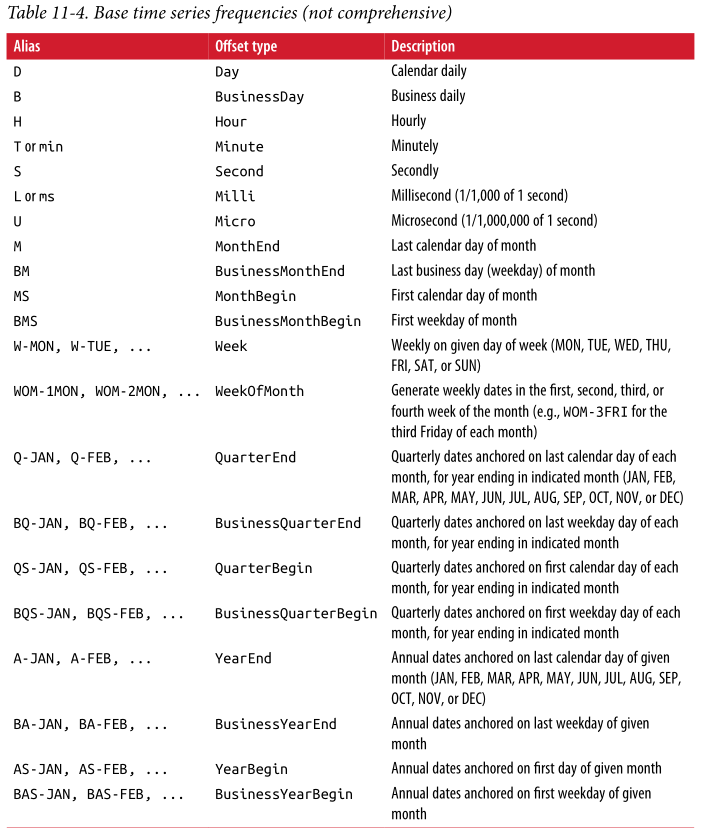

$date\_range()$ by default preserves the time of the start and end timestamp:

In [69]:
pd.date_range('2019/8/15 15:02:36', periods=5)

DatetimeIndex(['2019-08-15 15:02:36', '2019-08-16 15:02:36',
               '2019-08-17 15:02:36', '2019-08-18 15:02:36',
               '2019-08-19 15:02:36'],
              dtype='datetime64[ns]', freq='D')

But sometimes we want to generate a set of timestamps normalized to midnight as a convention,. To do this, there is an option $normalize$:

In [70]:
pd.date_range('2019/8/15 15:02:36', periods=5, normalize=True)

DatetimeIndex(['2019-08-15', '2019-08-16', '2019-08-17', '2019-08-18',
               '2019-08-19'],
              dtype='datetime64[ns]', freq='D')

#### Frequencies and Date Offsets  
Frequencies in pandas are composed of a *base frequency* and multiplier. Base frequencies are typically referred to by a string alias like 'M' for monthly or 'H' for hourly. For each base frequency, there is an object defined generally referred to as a *date offset*. For example, hourly frequency can be represented with the Hour class:

In [71]:
from pandas.tseries.offsets import Hour, Minute

In [72]:
hour = Hour()

In [73]:
hour

<Hour>

In [74]:
five_hour = Hour(5)

In [75]:
five_hour

<5 * Hours>

In many applications, we would never need to explicitly create one of these objects, instead using a string alias like 'H' or '4H'. Putting an integer before the base frequency creates a multiple:

In [76]:
pd.date_range('2019/8/15', '2019/8/15 23:59', freq='3H')

DatetimeIndex(['2019-08-15 00:00:00', '2019-08-15 03:00:00',
               '2019-08-15 06:00:00', '2019-08-15 09:00:00',
               '2019-08-15 12:00:00', '2019-08-15 15:00:00',
               '2019-08-15 18:00:00', '2019-08-15 21:00:00'],
              dtype='datetime64[ns]', freq='3H')

Many offsets can be combined together by addition:

In [77]:
Hour(2) + Minute(45)

<165 * Minutes>

In [78]:
pd.date_range('2018/8/15', periods=15, freq='1h30min')

DatetimeIndex(['2018-08-15 00:00:00', '2018-08-15 01:30:00',
               '2018-08-15 03:00:00', '2018-08-15 04:30:00',
               '2018-08-15 06:00:00', '2018-08-15 07:30:00',
               '2018-08-15 09:00:00', '2018-08-15 10:30:00',
               '2018-08-15 12:00:00', '2018-08-15 13:30:00',
               '2018-08-15 15:00:00', '2018-08-15 16:30:00',
               '2018-08-15 18:00:00', '2018-08-15 19:30:00',
               '2018-08-15 21:00:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates  
One useful frequency class is 'week of month', starting with **WOM**, this enable us to get dates like the third-friday of each month:

In [79]:
# 获取每一个月的第三个周五对应的日期
pd.date_range('2019/1/1', '2019/8/15', freq='WOM-3FRI')

DatetimeIndex(['2019-01-18', '2019-02-15', '2019-03-15', '2019-04-19',
               '2019-05-17', '2019-06-21', '2019-07-19'],
              dtype='datetime64[ns]', freq='WOM-3FRI')


#### Shifting (Leading and Lagging, 超前和滞后) Date  
"Shifting" refers to move date backword and forward through time. Both DataFrame and Series have the $shift()$ method for doing naive shifts forward or backward, leaving the index unmodified:

In [80]:
ts = pd.Series(np.random.randn(5),
              index=pd.date_range('2019/8/1', periods=5))

In [81]:
ts

2019-08-01   -0.845982
2019-08-02   -1.999469
2019-08-03    0.367925
2019-08-04   -0.611479
2019-08-05    2.130977
Freq: D, dtype: float64

In [82]:
ts.shift(2) # 参数是正数表示向前移动

2019-08-01         NaN
2019-08-02         NaN
2019-08-03   -0.845982
2019-08-04   -1.999469
2019-08-05    0.367925
Freq: D, dtype: float64

In [83]:
ts.shift(-2) # 参数是负数表示向后移动

2019-08-01    0.367925
2019-08-02   -0.611479
2019-08-03    2.130977
2019-08-04         NaN
2019-08-05         NaN
Freq: D, dtype: float64

In [84]:
ts / ts.shift(1) - 1

2019-08-01         NaN
2019-08-02    1.363489
2019-08-03   -1.184011
2019-08-04   -2.661970
2019-08-05   -4.484953
Freq: D, dtype: float64

Because naive shifts leave the index unmodified, some data is discarded. Thus, if the frequency is known, it can be passed to $shift()$ to advance the timestamps instead of simply the data:

In [85]:
# 传入参数freq，日期索引也跟着移动
ts.shift(2, freq='D')

2019-08-03   -0.845982
2019-08-04   -1.999469
2019-08-05    0.367925
2019-08-06   -0.611479
2019-08-07    2.130977
Freq: D, dtype: float64

Other frequencies can be passed, too, giving us some flexibility in how to lead or lag the data:

In [86]:
ts.shift(3, freq='D')

2019-08-04   -0.845982
2019-08-05   -1.999469
2019-08-06    0.367925
2019-08-07   -0.611479
2019-08-08    2.130977
Freq: D, dtype: float64

In [87]:
ts.shift(1, freq='90T')

2019-08-01 01:30:00   -0.845982
2019-08-02 01:30:00   -1.999469
2019-08-03 01:30:00    0.367925
2019-08-04 01:30:00   -0.611479
2019-08-05 01:30:00    2.130977
Freq: D, dtype: float64

The $T$ here stands for minutes.

#### Shifting dates with offset  
The pandas date offsets can also be used with datetime or timestamp objects:

In [88]:
from pandas.tseries.offsets import Day, MonthEnd

In [89]:
now = datetime(2018, 8, 15)

In [90]:
now + 3 * Day()

Timestamp('2018-08-18 00:00:00')

If we add an anchored offset like MonthEnd, the first increment will 'roll forward' a date to the next date according to the frequency rule:

In [91]:
now + MonthEnd()

Timestamp('2018-08-31 00:00:00')

In [92]:
now + MonthEnd(2)

Timestamp('2018-09-30 00:00:00')

Anchored offsets can explicitly roll forward or backward by simply using their $rollforward()$ and $rollback()$ methods, respectively:

In [93]:
offset = MonthEnd()


In [94]:
offset.rollforward(now)

Timestamp('2018-08-31 00:00:00')

In [95]:
offset.rollback(now)

Timestamp('2018-07-31 00:00:00')

A creative use of date offset is to use these method with $groupby()$:

In [96]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [97]:
ts

2000-01-15    0.228117
2000-01-19   -1.928877
2000-01-23   -0.322452
2000-01-27   -0.918167
2000-01-31    0.147686
2000-02-04   -1.082823
2000-02-08    0.558947
2000-02-12    0.607196
2000-02-16    0.844337
2000-02-20   -0.378917
2000-02-24   -1.390209
2000-02-28    0.644472
2000-03-03    1.467447
2000-03-07    0.014899
2000-03-11    1.030799
2000-03-15    0.595696
2000-03-19   -0.521277
2000-03-23   -2.003899
2000-03-27    0.307486
2000-03-31   -0.209415
Freq: 4D, dtype: float64

In [98]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.558739
2000-02-29   -0.028142
2000-03-31    0.085217
dtype: float64

Of course, an easier and faster to do this is using $resample()$:

In [99]:
ts.resample('M').mean()

2000-01-31   -0.558739
2000-02-29   -0.028142
2000-03-31    0.085217
Freq: M, dtype: float64

### 11.4 Time Zone Handling  
Working with time zones is generally considered one of the most unpleasant parts of time series manipulation. As a result many timer series users choose to work with timer series at *coordinated universal time* or *UTC*, which is the successor to Greenwich Mean Time and is the international standard. Time zones ares expressed as the offsets from UTC; for example, New York is four hours behind UTC at daylight saving time (夏令时，DST) and five hours behind the rest of the year.  
  
In Python, time zone information comes from the third-party $pytz$ library (installable with pip or conda),  which exposes the *Olson database*, a compilation of world time zone information. This is especially important for historical data because the daylight saving time (DST) transition dates (and even UTC offsets) have been changed numerous time depending on the whims (一时的兴致) of the local governments.  
  
As far as this book is concerned, pandas wrap *pytz*'s functionality so we can ignore its API outside of the time zone names. The time zone names can be found interactively and in the docs:

In [100]:
import pytz

In [101]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [102]:
pytz.common_timezones[:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

To get a time zone object from *pytz*, use $pytz.timezone()$:

In [109]:
pytz.timezone?

In [110]:
tz = pytz.timezone("America/New_York")

In [111]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

Methods in pandas will accept either time zone or these objects.

#### Time Zone Localization and Conversion  
By default, time series in pandas are *time zone naive*. For example, consider the following time series:

In [112]:
rng = pd.date_range('3/8/2019 8:30', periods=6, freq='D')

In [113]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [114]:
ts

2019-03-08 08:30:00    0.354074
2019-03-09 08:30:00   -0.469508
2019-03-10 08:30:00   -1.663843
2019-03-11 08:30:00    0.005848
2019-03-12 08:30:00   -1.552737
2019-03-13 08:30:00    1.729569
Freq: D, dtype: float64

The index's *tz* is None:

In [117]:
# The index's *tz* is None
print(ts.index.tz)

None


Date ranges can be generated with a time zone set:

In [118]:
pd.date_range('3/8/2019 8:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2019-03-08 08:30:00+00:00', '2019-03-09 08:30:00+00:00',
               '2019-03-10 08:30:00+00:00', '2019-03-11 08:30:00+00:00',
               '2019-03-12 08:30:00+00:00', '2019-03-13 08:30:00+00:00',
               '2019-03-14 08:30:00+00:00', '2019-03-15 08:30:00+00:00',
               '2019-03-16 08:30:00+00:00', '2019-03-17 08:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

Conversion from naive to *localized* is handled by the $tz\_localize()$ method:

In [119]:
ts

2019-03-08 08:30:00    0.354074
2019-03-09 08:30:00   -0.469508
2019-03-10 08:30:00   -1.663843
2019-03-11 08:30:00    0.005848
2019-03-12 08:30:00   -1.552737
2019-03-13 08:30:00    1.729569
Freq: D, dtype: float64

In [121]:
ts_utc = ts.tz_localize('UTC')

In [122]:
ts_utc

2019-03-08 08:30:00+00:00    0.354074
2019-03-09 08:30:00+00:00   -0.469508
2019-03-10 08:30:00+00:00   -1.663843
2019-03-11 08:30:00+00:00    0.005848
2019-03-12 08:30:00+00:00   -1.552737
2019-03-13 08:30:00+00:00    1.729569
Freq: D, dtype: float64

In [124]:
print(ts_utc.index.tz)

UTC


In [125]:
ts_utc.index

DatetimeIndex(['2019-03-08 08:30:00+00:00', '2019-03-09 08:30:00+00:00',
               '2019-03-10 08:30:00+00:00', '2019-03-11 08:30:00+00:00',
               '2019-03-12 08:30:00+00:00', '2019-03-13 08:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

Once a time series has been localized to a particular time zone, it can be converted to another time zone with $tz\_convert()$:

In [126]:
ts_utc.tz_convert('America/New_York')

2019-03-08 03:30:00-05:00    0.354074
2019-03-09 03:30:00-05:00   -0.469508
2019-03-10 04:30:00-04:00   -1.663843
2019-03-11 04:30:00-04:00    0.005848
2019-03-12 04:30:00-04:00   -1.552737
2019-03-13 04:30:00-04:00    1.729569
Freq: D, dtype: float64

In [127]:
ts_eastern = ts.tz_localize('America/New_York')

In [128]:
ts_eastern.tz_convert('UTC')

2019-03-08 13:30:00+00:00    0.354074
2019-03-09 13:30:00+00:00   -0.469508
2019-03-10 12:30:00+00:00   -1.663843
2019-03-11 12:30:00+00:00    0.005848
2019-03-12 12:30:00+00:00   -1.552737
2019-03-13 12:30:00+00:00    1.729569
Freq: D, dtype: float64

In [129]:
ts_eastern.tz_convert('Europe/Berlin')

2019-03-08 14:30:00+01:00    0.354074
2019-03-09 14:30:00+01:00   -0.469508
2019-03-10 13:30:00+01:00   -1.663843
2019-03-11 13:30:00+01:00    0.005848
2019-03-12 13:30:00+01:00   -1.552737
2019-03-13 13:30:00+01:00    1.729569
Freq: D, dtype: float64

$tz\_localize()$ and $tz\_convert()$ are also instance methods on DatetimeIndex:

In [130]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2019-03-08 08:30:00+08:00', '2019-03-09 08:30:00+08:00',
               '2019-03-10 08:30:00+08:00', '2019-03-11 08:30:00+08:00',
               '2019-03-12 08:30:00+08:00', '2019-03-13 08:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

#### Operations with Time Zone --Aware Timestamp objects  
Similar to time series and date ranges, individual Timestamp objects similarly can be localized from naive to time zone-aware and converted from one time zone to another:

In [131]:
stamp = pd.Timestamp('2019-8-16 10:20')

In [132]:
stamp_utc = stamp.tz_localize('UTC')

In [133]:
stamp_utc

Timestamp('2019-08-16 10:20:00+0000', tz='UTC')

In [134]:
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2019-08-16 18:20:00+0800', tz='Asia/Shanghai')

We can also pass a time zone when creating a timestamp:

In [139]:
stamp_guangzhou = pd.Timestamp('2019-8-16 10:22', tz='Asia/Shanghai')

In [140]:
stamp_guangzhou

Timestamp('2019-08-16 10:22:00+0800', tz='Asia/Shanghai')

Time zone-aware $Timestamp$ objects internally store a UTC timestamp value nanoseconds since the Unix epoch (January 1, 1970); this UTC value is invariant between time zone conversions:

In [141]:
stamp_utc.value

1565950800000000000

In [143]:
stamp_utc.tz_convert('Europe/Moscow').value

1565950800000000000

#### Operations Between Different Time Zones  
If two time series with different time zones are combined, the result will be UTC. Since the timestamp is stored under the hood in UTC, this is a straightforward operation and requires no conversion to happen:

In [144]:
rng = pd.date_range('16/8/2019 10:35', periods=10, freq='B')

In [145]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [146]:
ts

2019-08-16 10:35:00   -0.167553
2019-08-19 10:35:00   -1.250536
2019-08-20 10:35:00    1.927512
2019-08-21 10:35:00   -0.789807
2019-08-22 10:35:00   -1.166895
2019-08-23 10:35:00   -0.374233
2019-08-26 10:35:00   -2.497376
2019-08-27 10:35:00   -0.702129
2019-08-28 10:35:00   -0.166272
2019-08-29 10:35:00   -0.327602
Freq: B, dtype: float64

In [158]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[3:].tz_convert('Europe/Moscow')

In [159]:
result = ts1 + ts2

In [160]:
result.index

DatetimeIndex(['2019-08-16 09:35:00+00:00', '2019-08-19 09:35:00+00:00',
               '2019-08-20 09:35:00+00:00', '2019-08-21 09:35:00+00:00',
               '2019-08-22 09:35:00+00:00', '2019-08-23 09:35:00+00:00',
               '2019-08-26 09:35:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [161]:
result

2019-08-16 09:35:00+00:00         NaN
2019-08-19 09:35:00+00:00         NaN
2019-08-20 09:35:00+00:00         NaN
2019-08-21 09:35:00+00:00   -1.579613
2019-08-22 09:35:00+00:00   -2.333791
2019-08-23 09:35:00+00:00   -0.748467
2019-08-26 09:35:00+00:00   -4.994752
Freq: B, dtype: float64